<a href="https://colab.research.google.com/github/Ziad-o-Yusef/Deep-learning-notes/blob/main/9_face_recognition_with_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

In [3]:
faces = fetch_olivetti_faces()

In [4]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
target = faces['target']
target.shape

(400,)

In [6]:
images = faces['images']

In [7]:
images.shape

(400, 64, 64)

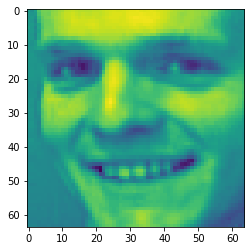

In [8]:
plt.imshow(images[46])

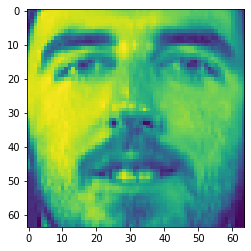

In [9]:
plt.imshow(images[100])

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(images,target,test_size=0.2)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
x_train.shape,x_test.shape

((320, 64, 64), (80, 64, 64))

In [13]:
x_train = x_train.reshape(320, 64, 64, 1)
y_train = to_categorical(y_train,40)
x_test= x_test.reshape(80, 64, 64, 1)
y_test =to_categorical(y_test,40)

In [14]:
x_test.shape

(80, 64, 64, 1)

In [15]:
import tensorflow as tf


In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(2,2),input_shape=(64, 64, 1), activation='relu',),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(2,2), activation='relu',),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(40, activation='softmax'),
])

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
10/10 [==============================] - 1s 26ms/step - loss: 3.7133 - accuracy: 0.0094 - val_loss: 3.6984 - val_accuracy: 0.0125
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 3.6784 - accuracy: 0.0500 - val_loss: 3.6812 - val_accuracy: 0.0375
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 3.6446 - accuracy: 0.0469 - val_loss: 3.6656 - val_accuracy: 0.0250
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 3.5578 - accuracy: 0.0969 - val_loss: 3.6193 - val_accuracy: 0.0375
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 3.3720 - accuracy: 0.1875 - val_loss: 3.3962 - val_accuracy: 0.1375
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 3.0148 - accuracy: 0.3281 - val_loss: 3.0416 - val_accuracy: 0.3000
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 2.4768 - accuracy: 0.4344 - val_loss: 2.5629 - val_accuracy: 0.4000
Epoch 8/1

In [39]:
model2 =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(2,2),input_shape=(64, 64, 1), activation='relu',),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(2,2), activation='relu',),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(40, activation='softmax'),

])

In [40]:
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [41]:
model2.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
10/10 [==============================] - 1s 28ms/step - loss: 3.7775 - accuracy: 0.0281 - val_loss: 3.7058 - val_accuracy: 0.0125
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 3.6630 - accuracy: 0.0531 - val_loss: 3.6830 - val_accuracy: 0.0375
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 3.6042 - accuracy: 0.1219 - val_loss: 3.6658 - val_accuracy: 0.0250
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 3.5134 - accuracy: 0.1000 - val_loss: 3.5959 - val_accuracy: 0.0750
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 3.2560 - accuracy: 0.2406 - val_loss: 3.3825 - val_accuracy: 0.0625
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 2.7935 - accuracy: 0.3500 - val_loss: 2.8460 - val_accuracy: 0.3250
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 2.1393 - accuracy: 0.5156 - val_loss: 2.3284 - val_accuracy: 0.4125
Epoch 8